In [1]:
import torch
import requests
from PIL import Image

from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
).to("cuda")

/home/rmuproject/rmuproject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]


Token indices sequence length is longer than the specified maximum sequence length for this model (108 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', giving the image a calming and artistic feel . the pattern is dense and occupies most of the visual space , creating a sense of depth and complexity .']


100%|██████████| 35/35 [00:13<00:00,  2.69it/s]


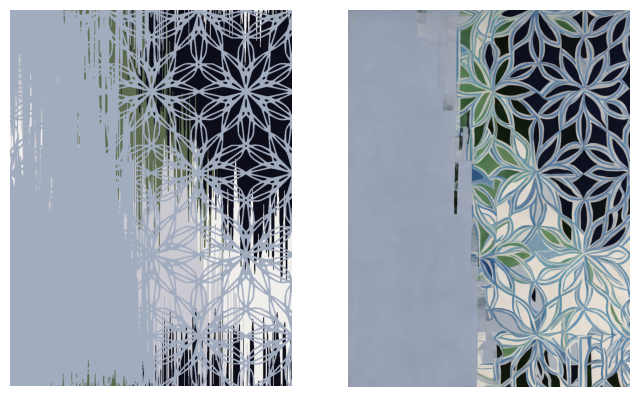

In [2]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image_path = '/home/rmuproject/rmuproject/users/sandesh/FinetunedSDIVP/scripts/Hareque.png'
# init_image = Image.open(requests.get(url, stream=True).raw)
init_image = Image.open(image_path).convert("RGB")
prompt = "The image depicts a complex geometric pattern composed of interconnected floral-like shapes. The design appears to be abstract, featuring a combination of overlapping lines and curves to form intricate flower forms. The background consists of a gradient, transitioning from a darker blue at the top to a lighter blue and green towards the left side. The overall color palette includes shades of blue and green, giving the image a calming and artistic feel. The pattern is dense and occupies most of the visual space, creating a sense of depth and complexity."
n_prompt = "bad, deformed, ugly, bad anotomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=0.7).images[0]
image.save("generated_image.png")

# Display the image
# image.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 12))
ax[0].imshow(init_image)
ax[1].imshow(image)
ax[0].axis("off")
ax[1].axis("off")
plt.show()

